# Question 1
## Part A

[-5.80798846e-02 -6.74879136e-02  4.68157241e-02  9.25413670e-02
  4.45619224e-02  4.30050423e-02  2.95052163e-02 -9.96359923e-02
  9.87288162e-02  5.21770811e-02 -6.32303649e-03 -7.82424070e-02
 -5.96853480e-02 -8.16518850e-02  3.07415092e-02 -6.74711360e-03
 -5.78245781e-02  9.69164966e-02 -2.12279374e-03 -6.24638969e-02
 -2.02685733e-02 -4.28706334e-03  9.67645697e-02 -9.28794594e-02
 -2.22677681e-02 -3.36892780e-02 -5.54723231e-02  7.12863536e-02
 -8.54118430e-02  6.43314155e-03 -7.31866962e-02 -3.69909808e-02
 -4.53451383e-02  1.89669822e-02  8.47030374e-02 -3.55399904e-02
  2.27253998e-02 -9.87993337e-03  5.90515213e-02 -9.69111464e-02
  1.66697817e-03 -8.80739772e-02 -7.79501377e-03 -1.48362872e-02
 -5.72129906e-02  3.86561225e-02  8.61291552e-02  7.33718623e-02
  8.44115505e-02  4.66433287e-02  1.58017893e-02  9.90756293e-02
 -7.83461232e-02  1.65643399e-02 -6.77304297e-02 -3.40074238e-02
  4.65011390e-02 -2.45819218e-03  4.76479398e-02 -2.81551156e-02
 -4.25409969e-02 -3.69180

(-1.5, 1.5)

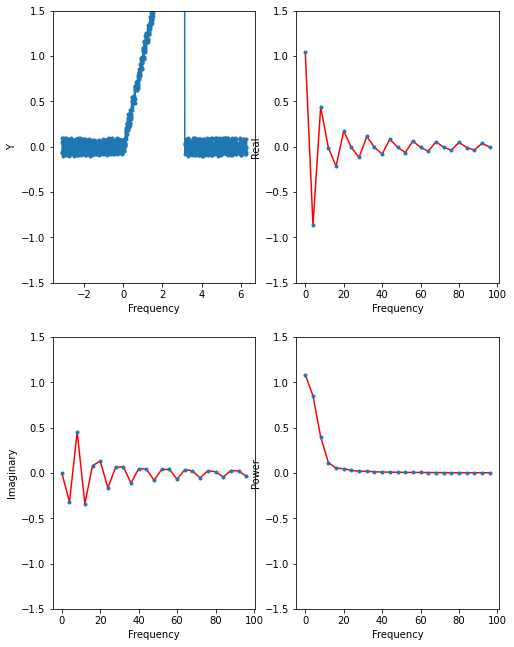

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random
from timeit import default_timer as timer


N_samples = 1000
f_s = 0.2
N_cycles = 2.0
period = 1/f_s
T =  N_cycles*period

t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
#plt.plot(t,y)

N_terms = int(N_samples/40)

random.seed(1)
f = np.zeros(N_terms)
dt = T/N_samples

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
    
print (y,f,t)

start = timer()

twopiT=2.0*np.pi/T

epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
print ("Souders: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))
    
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
print ("Python: ",(end-start))
print("Ratio = ",btime/(end-start))

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])

    
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-1.5,1.5)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)

## Part B

Based on the Fourier theorem, it can be expected that immediately after the "drop" of the triangular pulse signal, the Fourier components will be near 0.

The Nyquist theorem, also called the sampling theorem, is used for digitizing analog signals. In this theorem, samples are taken very frequently, and the rate at which they are taken is referred to as the sampling rate or sampling frequency. Higher frequency will result in a higher bandwidth for a given signal. According to this theorem, the sampling rate must be at least twice as high as the highest frequency component - if this level is not reached, the analog input signal is not digitized correctly. So, at least twice as many terms are needed.

# Question 2
## Part A - Frog Jump in Multiple Directions

Expectation value for n = 1 is 1.000000
Expectation value for n = 2 is 1.034200
Expectation value for n = 3 is 1.072200
Expectation value for n = 4 is 1.117600
Expectation value for n = 5 is 1.139700
Expectation value for n = 6 is 1.202800
Expectation value for n = 7 is 1.247900
Expectation value for n = 8 is 1.305000
Expectation value for n = 9 is 1.373500
Expectation value for n = 10 is 1.425100
Expectation value for n = 11 is 1.492400
Expectation value for n = 12 is 1.589300
Expectation value for n = 13 is 1.661200
Expectation value for n = 14 is 1.753900
Expectation value for n = 15 is 1.865800
Expectation value for n = 16 is 2.016600
Expectation value for n = 17 is 2.113300
Expectation value for n = 18 is 2.323100
Expectation value for n = 19 is 2.480600
Expectation value for n = 20 is 2.734700
Expectation value for n = 21 is 2.999600
Expectation value for n = 22 is 3.325400
Expectation value for n = 23 is 3.774100
Expectation value for n = 24 is 4.404300
Expectation value for n =

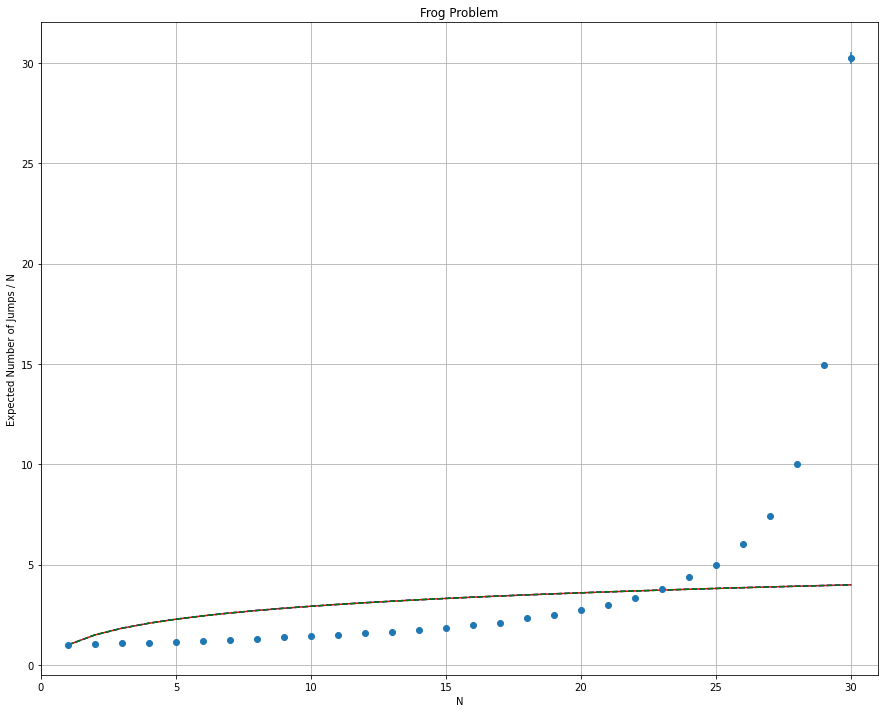

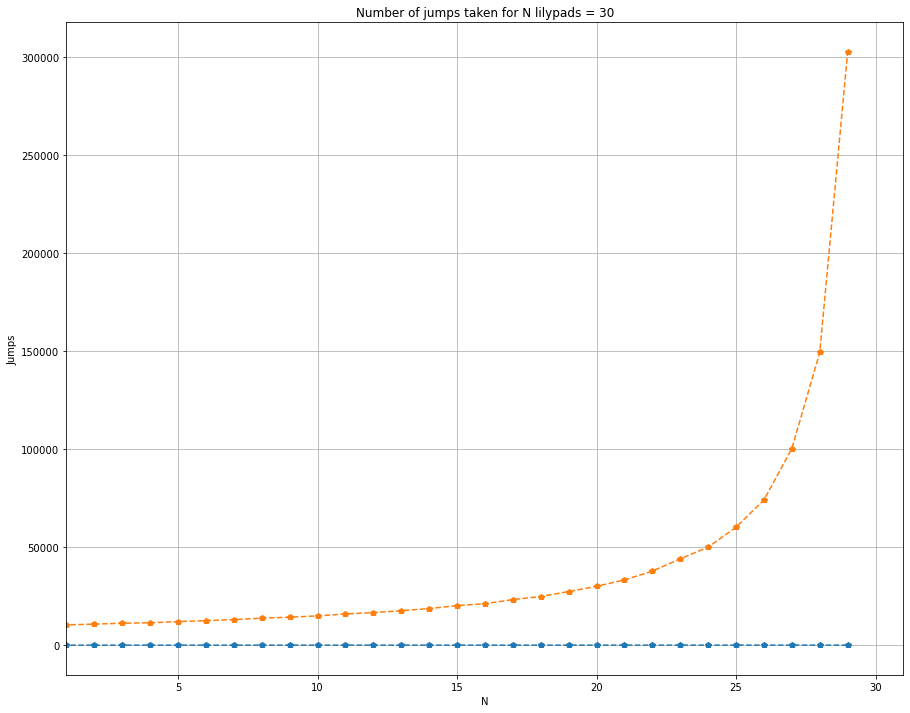

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

n = 30

random.seed(1)

start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []
jumps_taken_tuples = []

for npad in range(1,n+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        #evalr.append(eval[npad-1]/npad)
        evalr.append(eval[npad-1])
    #print("Theory: ",npad,eval[npad-1])
    
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalr3.append(sum2)
    
    #print (npad,sum2)
    
    end = npad
    jumps_taken_temp = 0
    for j in range(n_trys):
        while start < npad:
            jumps_taken_temp += 1
            jump = int(random.uniform((1-start),((n-start)+1)))

            #print ("Jump = ",jump)
            
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    jumps_taken_tuples.append((npad, jumps_taken_temp))
    
        
    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r')
ax1.plot(x,evalr2,'b--')
ax1.plot(x,evalr3,'g--')

fig2 = plt.figure(figsize=(15,12))
ax2 = fig2.add_subplot(111)
ax2.set_title("Number of jumps taken for N lilypads = 30")
ax2.set_ylabel("Jumps")
ax2.set_xlabel("N")
ax2.set_xlim(1,31)
ax2.grid(True)
ax2.plot(jumps_taken_tuples, 'p--')

# Question 3

In [33]:
## Poisson Distribution:

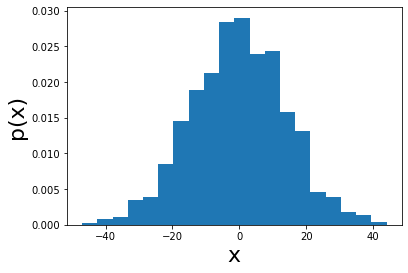

In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
from scipy.stats import poisson
from random import *
from math import *

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  
    r = stats.poisson.rvs(mu=1, size=nsteps)
    r = r.tolist()
    # Poisson returns positive values - need to allow for backwards steps too
    # Randomly decide if the resulting variables will be positive or negative
    fsteps = 0
    for i in range(len(r)):
        if randint(0,1) == 0:
            r[i] *= -1
        fsteps += r[i]

    return fsteps  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

mypois = poisson.stats(1)

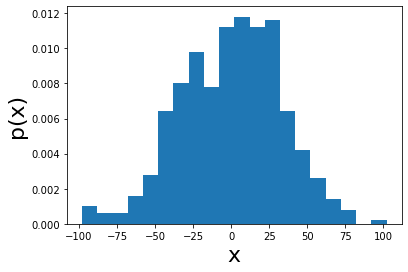

In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
from scipy.stats import poisson
from random import *
from math import *

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  
    r = stats.poisson.rvs(mu=1, size=nsteps)
    r = r.tolist()
    # Poisson returns positive values - need to allow for backwards steps too
    # Randomly decide if the resulting variables will be positive or negative
    fsteps = 0
    for i in range(len(r)):
        if randint(0,1) == 0:
            r[i] *= -1
        fsteps += r[i]

    return fsteps  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 500 # number of steps
npart = 500 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

mypois = poisson.stats(1)

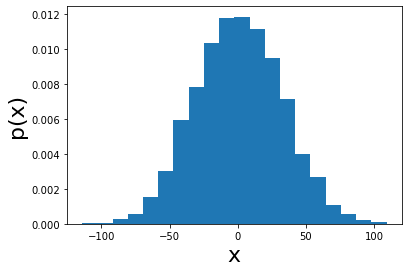

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
from scipy.stats import poisson
from random import *
from math import *

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  
    r = stats.poisson.rvs(mu=1, size=nsteps)
    r = r.tolist()
    # Poisson returns positive values - need to allow for backwards steps too
    # Randomly decide if the resulting variables will be positive or negative
    fsteps = 0
    for i in range(len(r)):
        if randint(0,1) == 0:
            r[i] *= -1
        fsteps += r[i]

    return fsteps  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 500 # number of steps
npart = 5000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

mypois = poisson.stats(1)

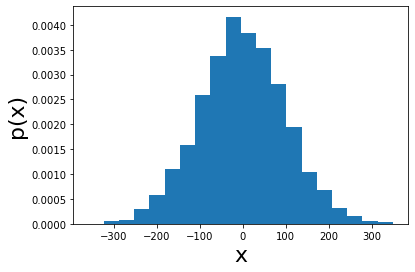

In [39]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
from scipy.stats import poisson
from random import *
from math import *

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  
    r = stats.poisson.rvs(mu=1, size=nsteps)
    r = r.tolist()
    # Poisson returns positive values - need to allow for backwards steps too
    # Randomly decide if the resulting variables will be positive or negative
    fsteps = 0
    for i in range(len(r)):
        if randint(0,1) == 0:
            r[i] *= -1
        fsteps += r[i]

    return fsteps  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 5000 # number of steps
npart = 5000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

mypois = poisson.stats(1)

## Explanation:

As you can see above, the first histogram represents the Poisson distribution with only 100 steps and 100 "sailors" to walk around. In the second histogram, the number of steps has been increased to 500 and the number of "sailors" to 500. The histogram is arguably worse. In the third histogram, the steps remained at 500 but the number of "sailors" was increased to 5000, and a smoother histogram was produced. Finally, in the fourth histogram, the steps had been increased to match that of the "sailors" and the smoothest histogram of the group was produced. As this pattern follows that of the Gaussian distribution histogram pattern, the central limit theorem is proven true in that as the Poisson distribution was performed more times for more observations, the histogram data approached a smoother normal distribution.